In [1]:
import pandas as pd
import numpy as np

In [2]:
original_df = pd.read_csv("./data/processed_movie_data.csv", delimiter=';', encoding='utf-8')
original_df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,30000000.0,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1.0,1.0,1995-10-30,373554033.0,81.0,1.0,7.7,5415.0,303,0.112121,1995,10,0,0
1,65000000.0,Adventure,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,3.0,1.0,1995-12-15,262797249.0,104.0,2.0,6.9,2413.0,395,-0.218750,1995,12,4,1
2,16000000.0,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1.0,1.0,1995-12-22,81452156.0,127.0,1.0,6.1,34.0,270,0.600000,1995,12,4,2
3,60000000.0,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,3.0,1.0,1995-12-15,187436818.0,170.0,2.0,7.7,1886.0,335,-0.053571,1995,12,4,3
4,35000000.0,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,5.231580,3.0,1.0,1995-12-22,64350171.0,106.0,1.0,5.5,174.0,448,-0.116667,1995,12,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,2196531.0,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",0.947509,1.0,1.0,2005-12-30,2411594.0,107.0,1.0,5.6,10.0,669,0.102083,2005,12,4,2
4681,12000000.0,Action,tt0479751,சிவாஜி,Corrupt police and politicians target a comput...,1.323587,1.0,1.0,2007-06-14,19000000.0,185.0,2.0,6.9,25.0,117,-0.055556,2007,6,3,3
4682,800000.0,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",0.903061,0.0,0.0,2006-11-23,1328612.0,100.0,1.0,5.8,6.0,378,0.380000,2006,11,3,2
4683,2000000.0,Romance,tt1718881,Про любоff,"У девушки Даши, приехавшей с подругой «покорят...",0.121844,1.0,1.0,2010-09-30,1268793.0,107.0,1.0,4.0,3.0,534,0.000000,2010,9,3,9


In [3]:
original_df = original_df[original_df['genres'].isin(["Action", "Comedy", "Drama"])].copy()
original_df.reset_index(drop=True, inplace=True)
original_df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,16000000.0,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1.0,1.0,1995-12-22,81452156.0,127.0,1.0,6.1,34.0,270,0.600000,1995,12,4,2
1,60000000.0,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,3.0,1.0,1995-12-15,187436818.0,170.0,2.0,7.7,1886.0,335,-0.053571,1995,12,4,3
2,35000000.0,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,5.231580,3.0,1.0,1995-12-22,64350171.0,106.0,1.0,5.5,174.0,448,-0.116667,1995,12,4,3
3,62000000.0,Comedy,tt0112346,The American President,"Widowed U.S. president Andrew Shepherd, one of...",6.318445,2.0,1.0,1995-11-17,107879496.0,106.0,1.0,6.5,199.0,269,0.320000,1995,11,4,2
4,98000000.0,Action,tt0112760,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,4.0,4.0,1995-12-22,10017322.0,119.0,2.0,5.7,137.0,383,-0.128571,1995,12,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2000000.0,Comedy,tt1820462,Beremennyy,The main character of the film Sergey Dobrolyu...,0.397106,0.0,1.0,2011-07-21,8000000.0,81.0,1.0,3.1,7.0,922,0.086435,2011,7,3,2
2922,2196531.0,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",0.947509,1.0,1.0,2005-12-30,2411594.0,107.0,1.0,5.6,10.0,669,0.102083,2005,12,4,2
2923,12000000.0,Action,tt0479751,சிவாஜி,Corrupt police and politicians target a comput...,1.323587,1.0,1.0,2007-06-14,19000000.0,185.0,2.0,6.9,25.0,117,-0.055556,2007,6,3,3
2924,800000.0,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",0.903061,0.0,0.0,2006-11-23,1328612.0,100.0,1.0,5.8,6.0,378,0.380000,2006,11,3,2


In [4]:
df = original_df.copy()

In [5]:
from utils.kohonen.kohonen import build_kohonen_net, _build_kohonen_net
from utils.kohonen.neuron_neighbours import prop2iters_neighbour_radius, relu_like_neighbour_radius, exp_neighbour_radius
from utils.kohonen.neuron_lr import inv2iter_learning_rate, fixed_learning_rate
from utils.kohonen.sample_pickers import stochastic_picker

In [6]:
seed = np.random.randint(0, 65000)
seed

36006

In [7]:
init_f = "sample no repos"
init_with_sample = True
picker_f = "stochastic"
neighbour_f = prop2iters_neighbour_radius
lr_f = fixed_learning_rate
grid_type = "rectangular"

In [8]:
random_state = np.random.default_rng(seed)

In [9]:
cols = ["budget", "popularity", "production_companies", 
        "production_countries", "revenue", "runtime", 
        "spoken_languages", "vote_average", "vote_count",
        "overview_length", "sentiment", "year",
        "month", "weekday"]

In [10]:
to_normalize = cols
for i in range(len(to_normalize)):
    df[to_normalize[i]] = (df[to_normalize[i]] - df[to_normalize[i]].mean()) / df[to_normalize[i]].std()
df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,-0.338627,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",-0.838685,-0.857145,-0.456935,1995-12-22,0.055390,0.705233,-0.550287,-0.182833,-0.523893,-0.214532,2.538370,-0.306167,1.446282,0.602027,2
1,0.926940,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",1.748029,0.049746,-0.456935,1995-12-15,0.832678,2.682968,0.518863,1.576938,1.162664,0.182616,-0.525639,-0.306167,1.446282,0.602027,3
2,0.207868,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,-0.586350,0.049746,-0.456935,1995-12-22,-0.070035,-0.260637,-0.550287,-0.842748,-0.396400,0.873043,-0.821436,-0.306167,1.446282,0.602027,3
3,0.984466,Comedy,tt0112346,The American President,"Widowed U.S. president Andrew Shepherd, one of...",-0.386470,-0.403700,-0.456935,1995-11-17,0.249207,-0.260637,-0.550287,0.257109,-0.373633,-0.220642,1.225702,-0.306167,1.155175,0.602027,2
4,2.019930,Action,tt0112760,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",-0.208811,0.503191,3.475392,1995-12-22,-0.468510,0.337283,0.518863,-0.622776,-0.430095,0.475895,-0.877247,-0.306167,1.446282,0.602027,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,-0.741307,Comedy,tt1820462,Beremennyy,The main character of the film Sergey Dobrolyu...,-1.475438,-1.310590,-0.456935,2011-07-21,-0.483305,-1.410483,-0.550287,-3.482404,-0.548481,3.769169,0.130725,0.712490,-0.009253,-0.155621,2
2922,-0.735654,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",-1.374216,-0.857145,-0.456935,2005-12-30,-0.524290,-0.214643,-0.550287,-0.732762,-0.545749,2.223346,0.204086,0.330493,1.446282,0.602027,2
2923,-0.453678,Action,tt0479751,சிவாஜி,Corrupt police and politicians target a comput...,-1.305053,-0.857145,-0.456935,2007-06-14,-0.402632,3.372876,0.518863,0.697052,-0.532089,-1.149357,-0.534941,0.457826,-0.300359,-0.155621,3
2924,-0.775822,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",-1.382390,-1.310590,-1.767711,2006-11-23,-0.532233,-0.536600,-0.550287,-0.512790,-0.549392,0.445345,1.506988,0.394160,1.155175,-0.155621,2


In [11]:
drama_df = df[df["genres"] == "Drama"]
comedy_df = df[df["genres"] == "Comedy"]
action_df = df[df["genres"] == "Action"]
drama_df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
5,0.696837,Drama,tt0112641,Casino,The life of the gambling paradise – Las Vegas ...,0.315856,0.503191,0.853841,1995-11-22,0.309587,3.050919,-0.550287,1.686924,0.668171,-1.387646,-0.977706,-0.306167,1.155175,-0.913268,4
6,-0.324245,Drama,tt0114388,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",0.414389,-0.403700,0.853841,1995-12-13,0.448108,1.119178,-0.550287,1.027009,-0.223373,-1.008828,-0.186589,-0.306167,1.446282,-0.913268,4
10,-0.695286,Drama,tt0113627,Leaving Las Vegas,"Ben Sanderson, an alcoholic Hollywood screenwr...",0.351651,-0.403700,-0.456935,1995-10-27,-0.176746,0.015326,-0.550287,0.917024,-0.222462,-0.410051,-1.446516,-0.306167,0.864068,0.602027,4
12,-0.482441,Drama,tt0112818,Dead Man Walking,A justice drama based on a true story about a ...,-0.281115,0.049746,0.853841,1995-12-29,-0.253285,0.475264,-0.550287,1.136995,-0.236122,0.115407,1.509592,-0.306167,1.446282,0.602027,4
14,-0.511204,Drama,tt0113347,How To Make An American Quilt,Soon-to-be-wed graduate student Finn Dodd deve...,-0.723475,-0.403700,-0.456935,1995-10-06,-0.369085,0.199301,-0.550287,0.257109,-0.520251,0.873043,0.612900,-0.306167,0.864068,0.602027,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,-0.585987,Drama,tt0449999,कभी अलविदा ना कहना,Dev and Maya are both married to different peo...,-1.112148,-0.403700,-0.456935,2006-08-11,-0.417299,3.740826,0.518863,-0.182833,-0.513876,-0.232862,0.936602,0.394160,0.281854,0.602027,4
2905,-0.698163,Drama,tt4643432,Dans les forêts de Sibérie,"Fed up with the hectic, senseless world he liv...",-1.303143,-0.857145,-0.456935,2016-06-15,-0.531031,-0.306631,1.588014,1.136995,-0.523893,1.978947,-0.534734,1.030820,-0.300359,-0.913268,4
2906,-0.770070,Drama,tt0431461,Waltzing Anna,Dr. Charlie Keegan is ordered to serve 6 month...,-1.487224,-1.310590,-1.767711,2006-08-11,-0.541893,-0.168649,-1.619438,0.807038,-0.553945,0.280376,0.763589,0.394160,0.281854,0.602027,4
2916,-0.597492,Drama,tt3266724,Black Rose,A Russian Police Major is enlisted by the LAPD...,-1.091872,-0.403700,-0.456935,2014-04-17,-0.535703,-1.318495,0.518863,-4.692247,-0.549392,-0.715549,-1.352754,0.903488,-0.882573,-0.155621,4


In [12]:
drama_df = drama_df[cols]
comedy_df = comedy_df[cols]
action_df = action_df[cols]
drama_df.sample(replace=False)

,budget,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday
42,-0.755688,-0.651399,-0.857145,-0.456935,-0.487616,-0.950544,-0.550287,0.587067,-0.299869,1.679559,0.48781,-0.306167,-0.009253,0.602027


In [13]:
def special_weight_init(X: np.ndarray, k: int, 
                        random_state: np.random.Generator = None) -> np.ndarray:
    n = X.shape[1]
    neuron_weights = np.zeros((k, k, n))

    if random_state is None:
        random_state = np.random.default_rng()

    for i in range(k):
        for j in range(k):
            if i > k/2:
                neuron_weights[i, j] = random_state.choice(drama_df.to_numpy())
            elif j > k/2:
                neuron_weights[i, j] = random_state.choice(comedy_df.to_numpy())
            else:
                neuron_weights[i, j] = random_state.choice(action_df.to_numpy())

    return neuron_weights
    
    

In [14]:
kohonen_net = _build_kohonen_net(df[cols].to_numpy(), cols, 5, len(cols)*500, 
                                lambda X, k : special_weight_init(X, k, random_state), lambda X, k: stochastic_picker(X, k, random_state), 
                                neighbour_f, lr_f, 
                                grid_type, True, len(cols)*10)

In [15]:
import matplotlib.pyplot as plt

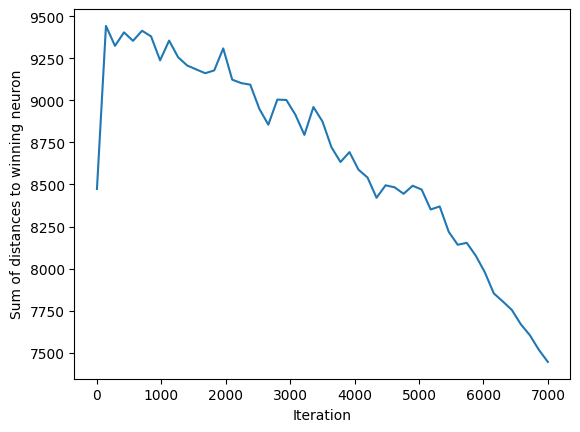

In [16]:
x_sum_dists = [t[0] for t in kohonen_net.sum_dists]
y_sum_dists = [t[1] for t in kohonen_net.sum_dists]
plt.xlabel("Iteration")
plt.ylabel("Sum of distances to winning neuron")
plt.plot(x_sum_dists, y_sum_dists)

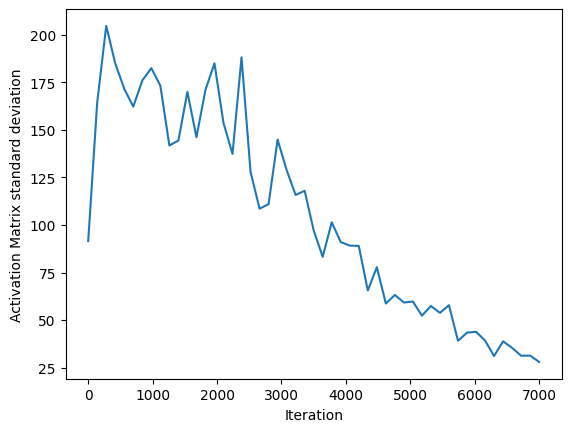

In [17]:
x_act_mat_sigmas = [t[0] for t in kohonen_net.act_mat_sigmas]
y_act_mat_sigmas = [t[1] for t in kohonen_net.act_mat_sigmas]
x_act_mat_sigmas = np.array(x_act_mat_sigmas)
y_act_mat_sigmas = np.array(y_act_mat_sigmas)
plt.xlabel("Iteration")
plt.ylabel("Activation Matrix standard deviation")
plt.plot(x_act_mat_sigmas, y_act_mat_sigmas)

In [18]:
act_mat = kohonen_net.activations_mat(df)
act_mat

array([[142, 136,  94, 129, 107],
       [132, 169, 100, 157,  87],
       [131, 129, 100, 183, 105],
       [106,  98, 128, 143,  78],
       [121,  82,  95, 105,  69]])

In [19]:
act_map = kohonen_net.activations_map(df)
act_map

{(1, 2): [0,
  26,
  33,
  37,
  47,
  49,
  61,
  74,
  108,
  124,
  135,
  145,
  152,
  153,
  162,
  219,
  254,
  268,
  274,
  280,
  281,
  288,
  299,
  334,
  336,
  342,
  343,
  345,
  367,
  371,
  375,
  385,
  390,
  396,
  400,
  408,
  423,
  456,
  459,
  504,
  521,
  548,
  590,
  643,
  645,
  646,
  663,
  665,
  686,
  692,
  693,
  711,
  732,
  754,
  765,
  807,
  812,
  825,
  831,
  863,
  930,
  932,
  942,
  957,
  1069,
  1101,
  1168,
  1176,
  1210,
  1212,
  1274,
  1370,
  1372,
  1484,
  1531,
  1538,
  1554,
  1748,
  1824,
  1974,
  1978,
  2133,
  2233,
  2313,
  2349,
  2480,
  2485,
  2527,
  2578,
  2593,
  2634,
  2648,
  2690,
  2734,
  2745,
  2760,
  2793,
  2808,
  2878,
  2906],
 (3, 4): [1,
  27,
  34,
  39,
  109,
  122,
  164,
  216,
  228,
  229,
  236,
  259,
  261,
  312,
  428,
  429,
  520,
  522,
  546,
  566,
  716,
  718,
  744,
  914,
  921,
  978,
  981,
  1058,
  1154,
  1224,
  1302,
  1395,
  1419,
  1462,
  1530,
  1576,


In [20]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

display(df.iloc[act_map[(0,0)]])

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
28,-0.079761,Comedy,tt0114536,Steal Big Steal Little,"Ruben and Robby are twin brothers, adopted by ...",-1.268488,-0.857145,-0.456935,1995-09-29,-0.495933,0.061320,-0.550287,-1.282690,-0.548481,3.280371,0.223620,-0.306167,0.572961,0.602027,2
42,-0.755688,Drama,tt0113540,Kids,A controversial portrayal of teens in New York...,-0.651399,-0.857145,-0.456935,1995-07-28,-0.487616,-0.950544,-0.550287,0.587067,-0.299869,1.679559,0.487810,-0.306167,-0.009253,0.602027,4
50,-0.718297,Drama,tt0111579,Утомлённые солнцем,"Russia, 1936: revolutionary hero Colonel Kotov...",-1.091265,0.049746,0.853841,1994-05-01,-0.522788,1.073184,-0.550287,0.477081,-0.522983,1.343511,-0.442481,-0.369833,-0.591466,2.117322,4
81,0.495497,Action,tt0110093,I Love Trouble,Rival Chicago reporters Sabrina Peterson (Robe...,-0.891764,-0.403700,-0.456935,1994-06-29,-0.087658,0.521258,0.518863,-1.062719,-0.517519,3.280371,1.053805,-0.369833,-0.300359,-0.913268,3
120,-0.775822,Drama,tt0108000,Ruby in Paradise,"Reeling from her mother's recent death, Ruby L...",-1.375230,-0.403700,-0.456935,1993-10-08,-0.534632,0.107314,-0.550287,-0.732762,-0.545749,0.775283,-0.714888,-0.433499,0.864068,0.602027,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,-0.698163,Drama,tt4643432,Dans les forêts de Sibérie,"Fed up with the hectic, senseless world he liv...",-1.303143,-0.857145,-0.456935,2016-06-15,-0.531031,-0.306631,1.588014,1.136995,-0.523893,1.978947,-0.534734,1.030820,-0.300359,-0.913268,4
2908,-0.626255,Action,tt0459759,Бой с тенью 2: Реванш,"When Artem Kolchin, Denis Nikiforov, arrives i...",-1.461833,-0.857145,-0.456935,2007-10-18,-0.460043,1.073184,-0.550287,-0.732762,-0.550303,0.934143,0.417004,0.457826,0.864068,-0.155621,3
2911,-0.698163,Action,tt1532382,Na Igre,After a stunning victory at a cyber sport tour...,-1.198955,-1.310590,-0.456935,2009-11-26,-0.514809,-0.674581,-0.550287,-0.292819,-0.543017,3.359801,0.567237,0.585158,1.155175,-0.155621,3
2921,-0.741307,Comedy,tt1820462,Beremennyy,The main character of the film Sergey Dobrolyu...,-1.475438,-1.310590,-0.456935,2011-07-21,-0.483305,-1.410483,-0.550287,-3.482404,-0.548481,3.769169,0.130725,0.712490,-0.009253,-0.155621,2


In [21]:
u_mat = kohonen_net.u_mat()
u_mat

array([[1.88064355, 1.63137953, 1.67860923, 2.20118741, 2.46287734],
       [1.61126568, 1.36025191, 1.42439263, 1.81927002, 2.14103184],
       [1.76721192, 1.46236396, 1.49203841, 1.50248342, 2.14108866],
       [2.02310206, 1.66949841, 1.88873945, 2.10079826, 3.12430459],
       [2.3955429 , 2.20481706, 2.35608807, 3.09932828, 4.07330897]])

In [22]:
from utils.kohonen.plots import plot_u_mat, plot_mat

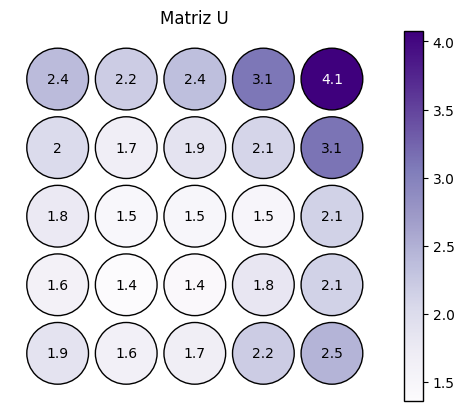

In [23]:
plot_u_mat(kohonen_net, u_mat)

In [24]:
kohonen_net.neuron_weights

array([[[-4.12191297e-01, -6.67790223e-01, -5.66496555e-01,
         -1.04152461e-01, -3.96189247e-01, -7.51980242e-02,
         -2.38234887e-01, -5.43466691e-01, -4.43416817e-01,
          1.90971997e+00,  1.25195169e-01,  7.21021208e-03,
          2.00644914e-01,  3.85336079e-01],
        [-4.35474967e-01, -5.22209718e-01, -5.63328528e-01,
         -3.94978312e-01, -3.39677776e-01, -5.59213473e-01,
         -4.20747243e-01, -2.69460895e-01, -4.34858412e-01,
          3.81129659e-01, -3.95686159e-01, -4.39581075e-01,
         -6.80579232e-01,  3.90804130e-01],
        [-5.74334347e-01, -4.59751006e-01, -6.72750201e-01,
         -4.29849802e-01, -2.70222333e-01, -2.70313874e-01,
         -2.74605394e-01,  7.38809087e-02, -3.74625934e-01,
         -1.97715050e-01,  5.88085547e-01, -1.52157318e+00,
         -5.26416619e-01,  8.50402911e-02],
        [-5.25656048e-01, -2.29394947e-01, -5.30933840e-01,
         -3.04862930e-01, -2.74971818e-01,  7.20747200e-01,
          1.49136289e-01,  6

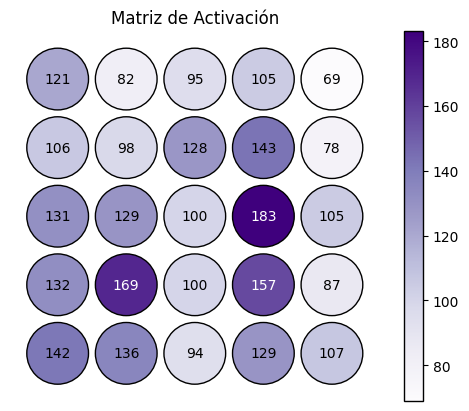

In [25]:
plot_mat(kohonen_net, act_mat, "Matriz de Activación")

In [26]:
kohonen_net.init_neuron_weights

array([[[ 0.40920837,  0.38772334, -0.40369952, -0.45693481,
         -0.20299238, -0.44461225, -0.55028749, -0.07284767,
          0.29752922, -0.20842181, -0.63912106,  0.77615588,
         -1.75589365,  0.60202682],
        [ 2.07745553,  2.0160079 ,  0.95663613,  0.85384094,
          1.88248244, -0.26063694, -0.55028749, -0.84274759,
          2.21357499,  0.29259573, -0.87724688,  0.33049345,
         -0.30035939, -0.91326821],
        [ 0.40920837,  0.38928121, -0.85714473, -0.45693481,
         -0.08727118, -0.16864928, -0.55028749,  0.03713803,
         -0.3135291 ,  0.27426582,  0.06037353, -0.56083143,
         -0.30035939,  0.60202682],
        [ 1.50219789, -0.22243723,  0.95663613, -0.45693481,
          0.65883995, -1.08852586, -0.55028749, -1.062719  ,
         -0.24796099,  0.88526281, -0.09868708,  0.52149163,
          1.15517487, -0.91326821],
        [ 0.92694025,  0.87097757, -0.40369952, -0.45693481,
          1.39505615, -0.39861842, -0.55028749,  1.68692357,
  

In [27]:
kohonen_net.neuron_positions[0,0]

array([0., 0.])

In [28]:
from utils.distance import euclidean_distance

if init_with_sample:
    init_sample = dict()
    sample_to_neu = dict()

    for idx, sample in df.iterrows():
        sample_df = sample.to_frame().T
        X_p = sample_df[cols].to_numpy().astype(float)
        for i in range(kohonen_net.k):
            for j in range(kohonen_net.k):
                dist = euclidean_distance(np.reshape(X_p, (X_p.size,)), np.reshape(kohonen_net.init_neuron_weights[i, j], (X_p.size,)))
                if dist <= np.finfo(float).eps:
                    init_sample[(i, j)] = idx
                    sample_to_neu[idx] = (i, j)

    display(init_sample)

{(4, 0): 98,
 (1, 1): 117,
 (2, 1): 290,
 (0, 4): 312,
 (1, 0): 339,
 (4, 4): 369,
 (0, 2): 390,
 (1, 3): 391,
 (3, 3): 432,
 (3, 4): 725,
 (3, 2): 746,
 (4, 2): 763,
 (3, 1): 830,
 (3, 0): 870,
 (2, 2): 1227,
 (0, 1): 1446,
 (1, 4): 1453,
 (2, 4): 1565,
 (0, 3): 1832,
 (1, 2): 1983,
 (2, 3): 2079,
 (0, 0): 2221,
 (4, 1): 2337,
 (4, 3): 2513,
 (2, 0): 2855}

In [29]:
if init_with_sample:
    init_sample_vals = list(init_sample.values())
    display(original_df.iloc[init_sample_vals])

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
98,40000000.0,Drama,tt0109456,Color of Night,When New York psychiatrist Bill Capa visits Lo...,14.228963,2.0,1.0,1994-08-19,19726050.0,121.0,2.0,5.4,117.0,213,0.145455,1994,8,4,4
117,22000000.0,Action,tt0107978,RoboCop 3,The mega corporation Omni Consumer Products is...,8.685798,1.0,1.0,1993-04-17,10696210.0,104.0,2.0,4.2,309.0,478,-0.500000,1993,4,5,3
290,80000000.0,Action,tt0119094,Face/Off,An antiterrorism agent goes under the knife to...,11.467391,6.0,1.0,1997-06-27,245676146.0,138.0,2.0,6.8,1612.0,246,0.000000,1997,6,4,3
312,60000000.0,Comedy,tt0120382,The Truman Show,"Truman Burbank is the star of ""The Truman Show...",13.155901,2.0,1.0,1998-06-04,264118201.0,103.0,1.0,7.8,4702.0,376,0.334091,1998,6,3,2
339,13000000.0,Action,tt0120609,The Big Hit,Affable hit man Melvin Smiley is constantly be...,5.975082,1.0,1.0,1998-04-24,27007143.0,91.0,1.0,6.1,112.0,458,-0.064286,1998,4,4,3
369,25000000.0,Drama,tt0095953,Rain Man,Selfish yuppie Charlie Babbitt's father left a...,11.267467,2.0,1.0,1988-12-11,412800000.0,133.0,2.0,7.6,1762.0,138,-0.250000,1988,12,6,4
390,42000000.0,Action,tt0102803,The Rocketeer,Straight from the pages of a pulp comic from a...,10.536644,1.0,1.0,1991-06-21,62000000.0,108.0,1.0,6.3,265.0,350,0.071429,1991,6,4,3
391,8000000.0,Comedy,tt0088161,Splash,A successful businessman falls in love with th...,8.441602,1.0,1.0,1984-03-09,69821334.0,111.0,2.0,6.1,328.0,153,0.416667,1984,3,4,2
432,70000000.0,Drama,tt0133952,The Siege,The secret US abduction of a suspected terrori...,9.019114,3.0,1.0,1998-11-06,116672912.0,116.0,3.0,6.1,361.0,142,-0.087879,1998,11,4,4
725,8200000.0,Drama,tt0087277,Footloose,When teenager Ren and his family move from big...,10.403992,2.0,1.0,1984-02-17,80035402.0,107.0,1.0,6.4,525.0,130,-0.025000,1984,2,4,4


In [30]:
from utils.pca import pca, plot_pca
import seaborn as sns

In [31]:
pca_data = pca(original_df, cols)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/pauli/Git/unsupervised-learning/utils/pca.py:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_data.xs[i], pca_data.ys[i], s=200, label=varnames, c=colors[i])


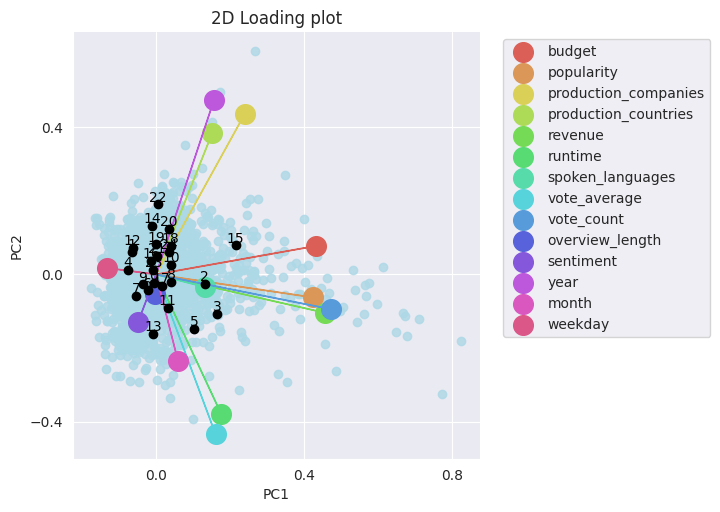

In [32]:
if init_with_sample:
    data = pca_data.pca_df_scaled.iloc[init_sample_vals].to_numpy()
    sns.set_style("darkgrid")
    plot_pca(pca_data)
    plt.scatter(data[:,0], data[:, 1], color="k")
    for i in range(data.shape[0]):
        plt.annotate("{}".format(i), xy=(data[i, 0], data[i, 1]), 
                    textcoords="data", ha="center", va="bottom", color="k")

In [33]:
if init_with_sample:
    vals_dict = dict()
    vals_dict["Neuron"] = []
    for i in range(len(init_sample_vals)):
        vals_dict["Neuron"].append(sample_to_neu[init_sample_vals[i]])
    vals_dict_df = pd.DataFrame(data=vals_dict)
    display(vals_dict_df)

,Neuron
0,"(4, 0)"
1,"(1, 1)"
2,"(2, 1)"
3,"(0, 4)"
4,"(1, 0)"
5,"(4, 4)"
6,"(0, 2)"
7,"(1, 3)"
8,"(3, 3)"
9,"(3, 4)"


In [34]:
drama_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
action_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
comedy_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        curr_neu = (i, j)
        count_genres = dict()
        count_genres["Drama"] = 0
        count_genres["Action"] = 0
        count_genres["Comedy"] = 0
        if curr_neu in act_map:
            for idx, sample in df.iloc[act_map[curr_neu]].iterrows():
                count_genres[sample["genres"]] += 1
        drama_mat[i, j] = count_genres["Drama"]
        action_mat[i, j] = count_genres["Action"]
        comedy_mat[i, j] = count_genres["Comedy"]

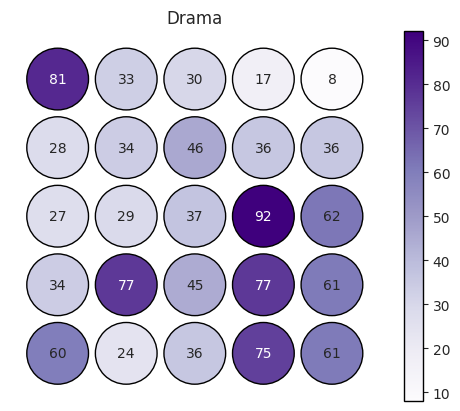

In [35]:
plot_mat(kohonen_net, drama_mat, "Drama")

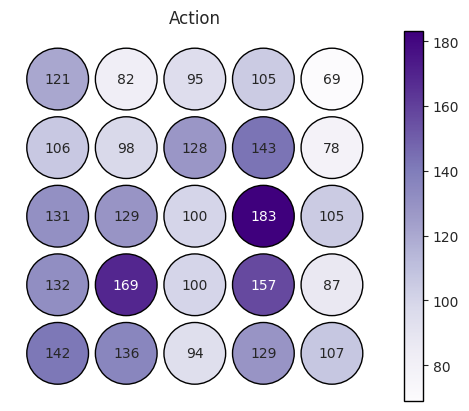

In [36]:
plot_mat(kohonen_net, act_mat, "Action")

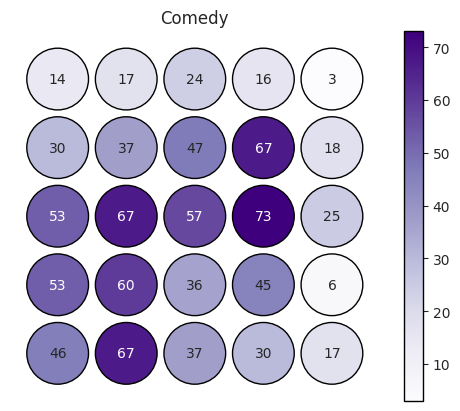

In [37]:
plot_mat(kohonen_net, comedy_mat, "Comedy")